# Project 3: Drone Delivery

### APMA 3100 Probability

#### Authors: Sonya Gar.. (i cant remember how its spelled), Joshua Tapp


## Model Analysis


## Graphs
## $f_{X} (x)$

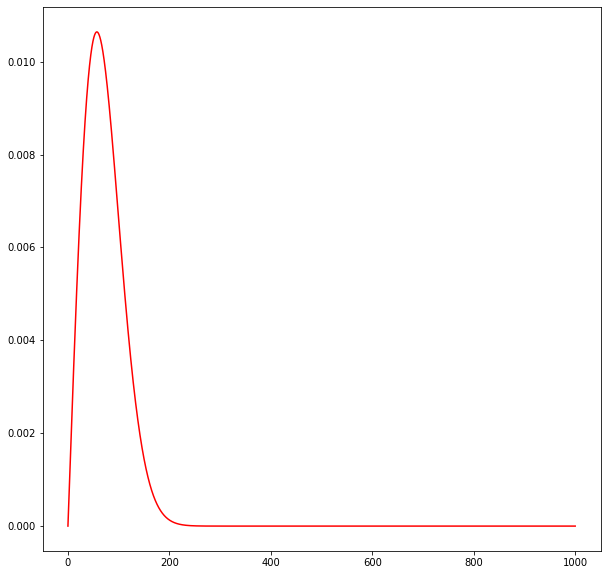

In [598]:
plotpdf(57)

## $F_{X} (x)$

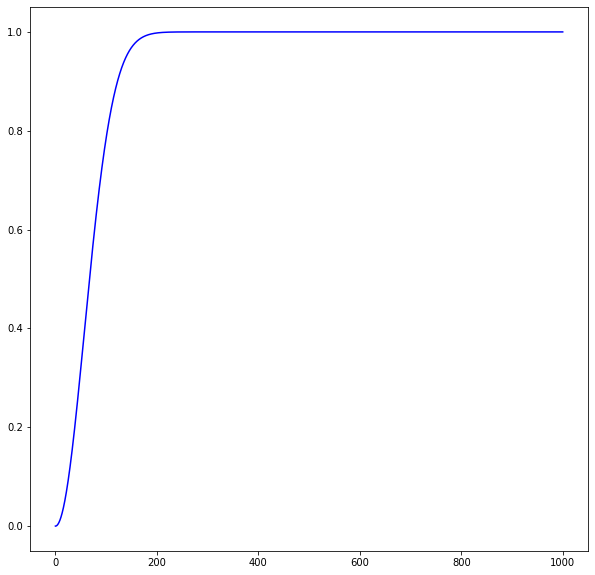

In [599]:
plotcdf(57)

### Area of Distribution W.R.T:  $F_{X}(x) = 0.5$, $F_{X}(x) = 0.7$, $F_{X}(x) = 0.9$ 

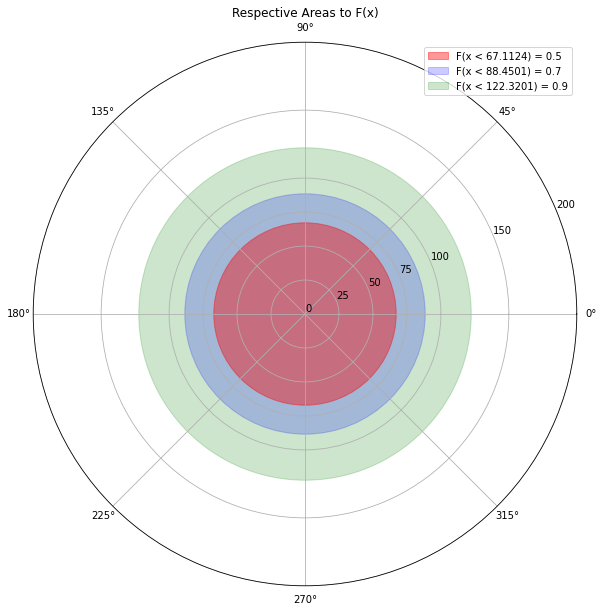

In [600]:
graphCircles()

## Law of Large Numbers

### a. Simulate X
#### i.   Random Number Generator

In [601]:
rand = randomGen()
for x in range(53):
    r = next(rand)
    if(x > 49):
        print(format('%i: %3.4f' %(x+1, r)))
# Generate the 51, 52, 53 random number from our given parameters

51: 0.1995
52: 0.2001
53: 0.0469


#### ii. Simulate Random Variable X

In [602]:
rd = randomGen()
def simulateX():
    p = next(rd)
    return inverseCDF(57, p)

def NsimulateX(n):
    total = 0
    for i in range(n):
        total+= simulateX()
    return total/n    

### b. Generate 110 independent values for $M_n$ for sample sizes $=[10, 30, 50, 100, 250, 500, 1000]$

In [591]:
def Mn110(n):
    values = []
    for i in range(110):
        values.append(NsimulateX(n))
    return values
sampleSizes = [10, 30, 50, 100, 250, 500, 1000]
simulatedValues = []
for x in sampleSizes:
    simulatedValues.append(Mn110(x))

### c. Scatterplot of data from part b

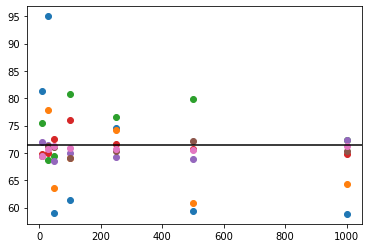

In [613]:
plt.scatter(sampleSizes, simulatedValues[0][0:7])
plt.scatter(sampleSizes, simulatedValues[1][0:7])
plt.scatter(sampleSizes, simulatedValues[2][0:7])
plt.scatter(sampleSizes, simulatedValues[3][0:7])
plt.scatter(sampleSizes, simulatedValues[4][0:7])
plt.scatter(sampleSizes, simulatedValues[5][0:7])
plt.scatter(sampleSizes, simulatedValues[6][0:7])

mean = np.sqrt(np.pi / (2*pow(1/57, 2)))
plt.axhline(mean, color='black')
# Need to look up how to properly plot all datapoints. Will only allow me to plot 7 data points per sample size

## Central Limit Theorem

In [467]:
# Code for simulating Events for part 2/3
# Written by Joshua Tapp (jct7bm) 04.29.2021

def randomGen():
    seed = 1000
    a = 24693
    c = 3967
    K = 262144 #2^18
    while True:
        seed = (((a * seed) + c) % K) # update seed
        output = seed / K             # return the random number
        yield output

In [597]:
# General Functions and Code for Graphing Model Analysis
# Written by Joshua Tapp (jct7bm) 04.29.2021

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def pdf(t, x):       #pdf of Rayleigh distribution
    a = 1/t
    if(x > 0):
        return ( pow(a, 2) * x * np.exp( -.5*pow(a, 2)* pow(x, 2) ) )
    
    else:
        return 0    # error x <= 0 
    
def cdf(t, x):       #cdf of Rayleigh distribution
    a = 1/t
    if(x > 0):
        return ( 1 - np.exp( -0.5 * pow( a, 2 ) * pow( x, 2 ) ) ) 
    
    else:
        return 0    # error x <= 0

def inversePDF(t, p):
    a = 1/t
    return np.sqrt( ( ( np.log( pow( ( (p - 1) * -1 ), -1) ) )  / ( pow( a, 2 ) / 2 ) ) )

def inverseCDF(t, p):
    a = 1/t
    return np.sqrt( ( ( np.log( pow( ( (p - 1) * -1 ), -1) ) )  / ( pow( a, 2 ) / 2 ) ) )


def meanRayleigh(t):
    return ( ( t ) * np.sqrt( math.pi / 2 ) )

def varRayleigh(t):
    a = 1/t
    return ( ( 4 - np.pi ) / ( 2 * pow( a, 2 ) ) )

def plotpdf(t):
    a = 1/t
    x = np.linspace(0,1000, 100000)
    y = ( pow(a, 2) * x * np.exp( -.5*pow(a, 2)* pow(x, 2) ) )
    plt.figure(figsize=(10,10))
    plt.plot(x,y, 'r')
    
def plotcdf(t):
    a = 1/t
    x = np.linspace(0,1000, 100000)
    y = ( 1 - np.exp( -0.5 * pow( a, 2 ) * pow( x, 2 ) ) ) 
    plt.figure(figsize=(10,10))
    plt.plot(x,y, 'b')

def graphCircles():
    plt.figure(figsize=(10,10))
    ax = plt.subplot(1, 1, 1, polar=True, aspect='auto')

    plt.title("Respective Areas to F(x)")
    lines, labels = plt.rgrids( (0, 25, 50, 75, 100, 150, 200))
    r1 = inverseCDF(57, .5)
    r2 = inverseCDF(57, .7)
    r3 = inverseCDF(57, .9)
    circle1 = pl.Circle( (0, 0), r1, transform=ax.transData._b, color="red", alpha=0.4)
    circle2 = pl.Circle( (0, 0), r2, transform=ax.transData._b, color="blue", alpha=0.2)
    circle3 = pl.Circle( (0, 0), r3, transform=ax.transData._b, color="green", alpha=0.2)
    circles = [circle1, circle2, circle3]
    ax.legend(circles, [ format('F(x < %3.4f) = 0.5' % r1), format('F(x < %3.4f) = 0.7' % r2), format('F(x < %3.4f) = 0.9' % r3) ])
    ax.add_artist(circle3)
    ax.add_artist(circle2)
    ax.add_artist(circle1)
   
# =)
